/tmp/ipython-input-399380752.py:29: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  country_list.dates = pd.to_datetime(country_list.index, format='%m/%d/%y')


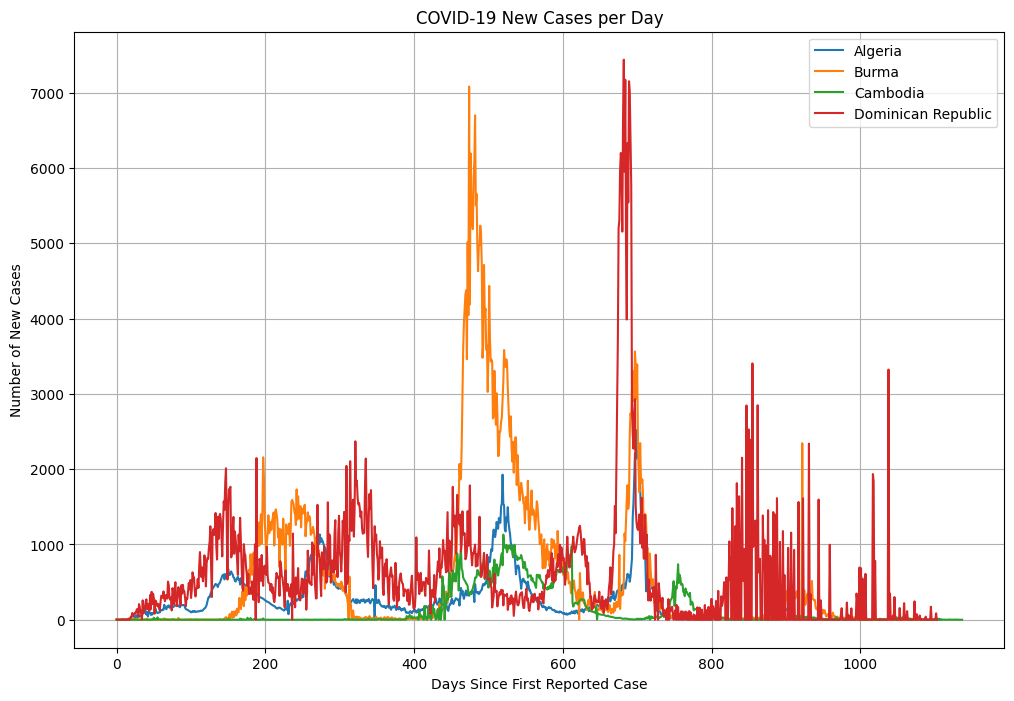

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
#####################
######### 1 #########
#####################
"1. Pick four countries. Show the time series plot of new cases per day for the four countries from the day of the first nonzero case day. (Note we do not want to show cumulative cases by day.)"
# Load CSV
df = pd.read_csv('time_series_covid19_confirmed_global.csv')

# Countries of interest
countries = ['Algeria', 'Burma', 'Cambodia', 'Dominican Republic']

# Delete non focus countries
df_countries = df[df['Country/Region'].isin(countries)]

# Extract dates (column 4)
date_columns = df.columns[4:]

# Create new dataframe with countries and dates
df_subset = df_countries[['Country/Region'] + list(date_columns)]

# Group all date data into its respective country
grouped_countries = df_subset.groupby('Country/Region').sum()

# Transpose list so we have country then a column of numbers that correspond to different dates for easier plotting
country_list = grouped_countries.T

# Turn each entry into a date for plotting
country_list.dates = pd.to_datetime(country_list.index, format='%m/%d/%y')

# Calculate the daily new cases by finding the difference from the previous day
df_new_cases = country_list.diff().fillna(0)


# Plot
plt.figure(figsize=(12, 8))
for country in countries:
    # Extract new cases
    country_new_cases = df_new_cases[country]

    # Find outbreak date
    first_case_day = country_new_cases.gt(0).idxmax()

    # Filter the data to start from this first case day
    country_cases = country_new_cases[first_case_day:]

    # Reset the index, so the x-axis represents "Days Since First Reported Case"
    country_cases.index = range(len(country_cases))

    # Plot the new cases for the country
    plt.plot(country_cases.index, country_cases.values, label=country)

# Plot titles
plt.title('COVID-19 New Cases per Day')
plt.xlabel('Days Since First Reported Case')
plt.ylabel('Number of New Cases')
plt.legend()
plt.grid(True)
plt.savefig('new_cases_per_day.png')
plt.show()


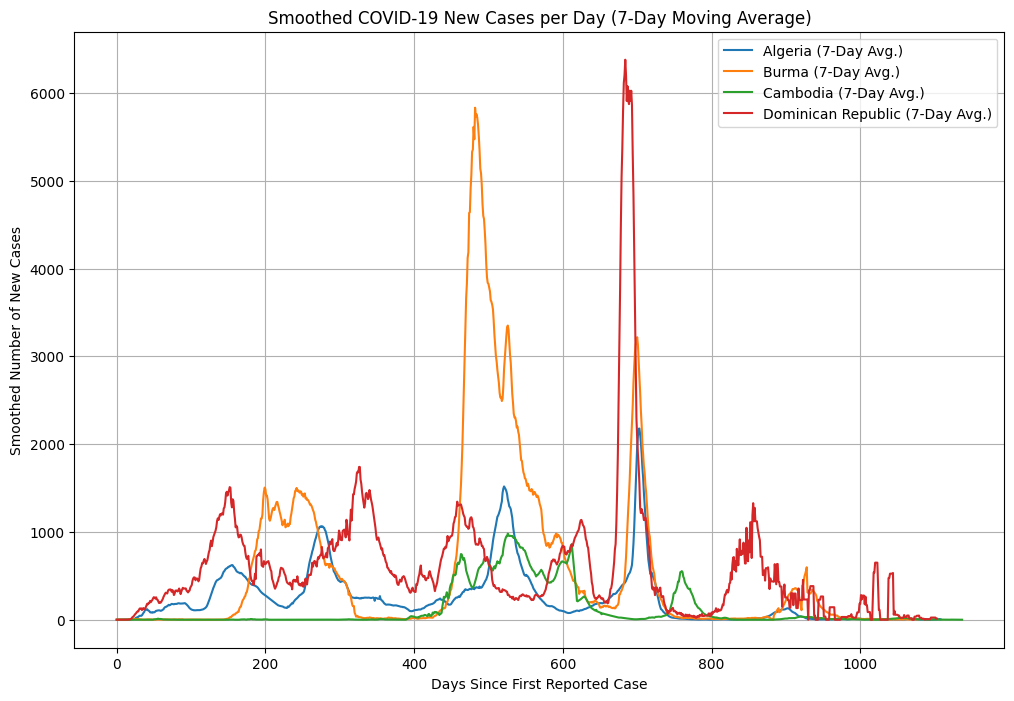

In [3]:
#####################
######### 2 #########
#####################

"2. Plot a smoothed version of the country specific data using a smoother such as a moving average, lowess or spline."
# New Plot
plt.figure(figsize=(12, 8))

for country in countries:
    # Extract new cases for the country
    country_new_cases = df_new_cases[country]

    # Iteratively takes the mean of 7 days (window=7) then finds and plots the mean of that window (i.e 7 day rolling avg)
    smoothed_cases = country_new_cases.rolling(window=7).mean()

    #Plot as before

    # Find the original outbreak date to align the plots
    first_case_day = country_new_cases.gt(0).idxmax()

    # Filter the SMOOTHED data to start from the first case day
    country_smoothed_cases = smoothed_cases[first_case_day:]

    # Reset the index to represent "Days Since First Reported Case"
    country_smoothed_cases.index = range(len(country_smoothed_cases))

    # Plot the smoothed cases for the country
    plt.plot(country_smoothed_cases.index, country_smoothed_cases.values, label=f'{country} (7-Day Avg.)')

# Plot titles
plt.title('Smoothed COVID-19 New Cases per Day (7-Day Moving Average)')
plt.xlabel('Days Since First Reported Case')
plt.ylabel('Smoothed Number of New Cases')
plt.legend()
plt.grid(True)
plt.savefig('smoothed_new_cases_per_day.png')
plt.show()



In [ ]:
#####################
######### 3 #########
#####################
"3. Let e be the difference between your observed case counts and the smoothed version. Plot e over time. (e is called the residual)."
# Create new plot
plt.figure(figsize=(12, 8))

for country in countries:

    # Initiate day by day and then the smoothed cases
    observed_cases = df_new_cases[country]
    smoothed_cases = observed_cases.rolling(window=7).mean()

    # Residual is the observed cases minus smooth cases
    e_residual = observed_cases - smoothed_cases

    # Find the original outbreak date to align the plots
    first_case_day = observed_cases.gt(0).idxmax()

    # Filter the RESIDUALS to start from the first case day
    residual_start = e_residual[first_case_day:]

    # Reset the index
    residual_start.index = range(len(residual_start))

    # Plot the residuals for the country
    plt.plot(residual_start.index, residual_start.values, label=f'{country} Residuals')

# Add plot titles
plt.title('Residuals (Observed - Smoothed) of New Cases')
plt.xlabel('Days Since First Reported Case')
plt.ylabel('Difference from 7-Day Average')
plt.legend()
plt.grid(True)
plt.savefig('residuals_plot.png')
plt.show()

In [4]:
#####################
######### 4 #########
#####################

"4. From the same website, download the daily death data. Calculate the overall case fatality rate = total deaths / total cases."

df_deaths = pd.read_csv('time_series_covid19_deaths_global.csv')


# Calculations
# Take the integer location (iloc) of the last column of deaths/total cases to find respective variable and sum them to get total number
total_deaths = df_deaths.iloc[:, -1].sum()
total_cases = df.iloc[:, -1].sum()
case_fatality_rate = total_deaths / total_cases
case_fatality_rate = total_deaths/total_cases

# Print rates
print(f"Total Confirmed Cases: {int(total_cases):,}")
print(f"Total Deaths: {int(total_deaths):,}")
print(f"Overall Case Fatality Rate: {case_fatality_rate:.4%}")

Total Confirmed Cases: 676,570,149
Total Deaths: 6,881,802
Overall Case Fatality Rate: 1.0172%


In [5]:
#####################
######### 5 #########
#####################

"5. For your four countries, plot the estimate of the case fatality rate up to that day in the outbreak, starting from the day of the first case. That is, for day d plot the number of deaths divided by the number of cases occuring up to day d."
# Create a transposed list of deaths similar to the one for cases for same reason
df_deaths_countries = df_deaths[df_deaths['Country/Region'].isin(countries)]
df_deaths_subset = df_deaths_countries[['Country/Region'] + list(date_columns)]
grouped_deaths = df_deaths_subset.groupby('Country/Region').sum()
deaths_list = grouped_deaths.T

# Calculate the daily case fatality rate by dividing the cumulative deaths by the cumulative cases
daily_case_fatality_rate = deaths_list / country_list
daily_case_fatality_rate = daily_case_fatality_rate.fillna(0)

# Create a new plot for the daily case fatality rate
plt.figure(figsize=(12, 8))

for country in countries:
    # Extract the case fatality rate for the country
    country_cfr = daily_case_fatality_rate[country]

    # Use the new cases data to find the start of the outbreak
    country_new_cases = df_new_cases[country]
    first_case_day = country_new_cases.gt(0).idxmax()

    # Filter the data to start from the first case day
    cfr_after_first = country_cfr[first_case_day:]

    # Reset the index to be "Days Since First Reported Case"
    cfr_after_first.index = range(len(cfr_after_first))

    # Plot the daily CFR
    plt.plot(cfr_after_first.index, cfr_after_first.values, label=country)

# Add plot titles
plt.title('Daily Case Fatality Rate Since First Case')
plt.xlabel('Days Since First Reported Case')
plt.ylabel('Case Fatality Rate (Deaths / Cases)')
plt.legend()
plt.grid(True)
plt.savefig('daily_cfr_plot.png')
plt.show()